In [1]:
# importing libs
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading datasets

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape 

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [8]:
def plot_sample(X, Y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])


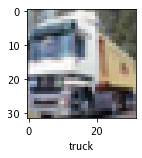

In [9]:
plot_sample(X_train, y_train, 1)

In [10]:
X_train = X_train / 255
X_test = X_test / 255


In [12]:
# simple Artifical neural network for image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

# 49% accuracy

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 122s 2ms/sample - loss: 1.8175 - accuracy: 0.3529
Epoch 2/5
50000/50000 [==============================] - 119s 2ms/sample - loss: 1.6279 - accuracy: 0.4241
Epoch 3/5
50000/50000 [==============================] - 120s 2ms/sample - loss: 1.5440 - accuracy: 0.4547
Epoch 4/5
50000/50000 [==============================] - 116s 2ms/sample - loss: 1.4864 - accuracy: 0.4769
Epoch 5/5
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.4377 - accuracy: 0.4951


In [12]:
# using cnn
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.4533 - accuracy: 0.4799
Epoch 2/5
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.1020 - accuracy: 0.6123
Epoch 3/5
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.9803 - accuracy: 0.6596
Epoch 4/5
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.8977 - accuracy: 0.6891
Epoch 5/5
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.8303 - accuracy: 0.7127


In [ ]:
# with just 5 epoch's cnn was able to recognize 71% accuracy. which is 